# Máquinas de vetores de suporte

O algorítmo das máquinas de vetores de suporte, ou Support Vector Machine (SVM), são uma excelente escolha na hora de um projeto de data science. Ele pode ser usado em problemas de regressão e classificação, lineares ou não, além de usar pouco recurso computacional. Outro fatore importante é que os vetores de suporte não carregam o peso dos outliers, assim reduz o risco de overfiting. 

## Funcionamento

O SVM cria um hiperplano de dimensão n-1 (atributos), separando as diferentes classes. 

<img src= "hiperplano.png">

Dessa maneira cria-se uma função de regreção logística, e quanto mais longe do hiperplano maior a chance de pertencer a uma classe. Então o objetivo final é deixar a maior margem possível entre o hiperplano e as classes a serem diferenciadas, além de ter a mesma distância entre elas.
A Margem pode ser feita de duas maneiras:

Hard Margin: Não é permitida nenhuma variável entre o hiperplano e o vetor de suporte.

Soft Margin: Pode-se encontrar variáveis entre o hiperplano e o vetor de suporte.

A Hard cria classificações diretas porém os dados reais são mais difíceis de criar um vetor inviolável.

<img src= "algoritmo.png">

## Classificação Usando SVM

O problema foi coletado em https://www.kaggle.com/datarohitingole/fetal-health-97-acc-multiple-model-testing/data

Cardiotocografia registra a frequência cardíaca do feto e as contrações uterinas. É muito importante ter os registros para que diminua os riscos do parto para a mãe e para o feto. Com os dados gravados desse método foi criado um modelo para classificar os exames em três diferentes classes.

   - Normal (1)
   - Suspect (2)
   - Pathological (3)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
data_frame = pd.read_csv("archive/fetal_health.csv")
data_frame.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
data_frame.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [5]:
data_frame.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

/home/matheus/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

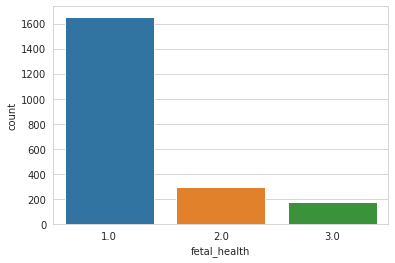

In [8]:
sns.countplot(data_frame['fetal_health'], label = "Count")

<AxesSubplot:>

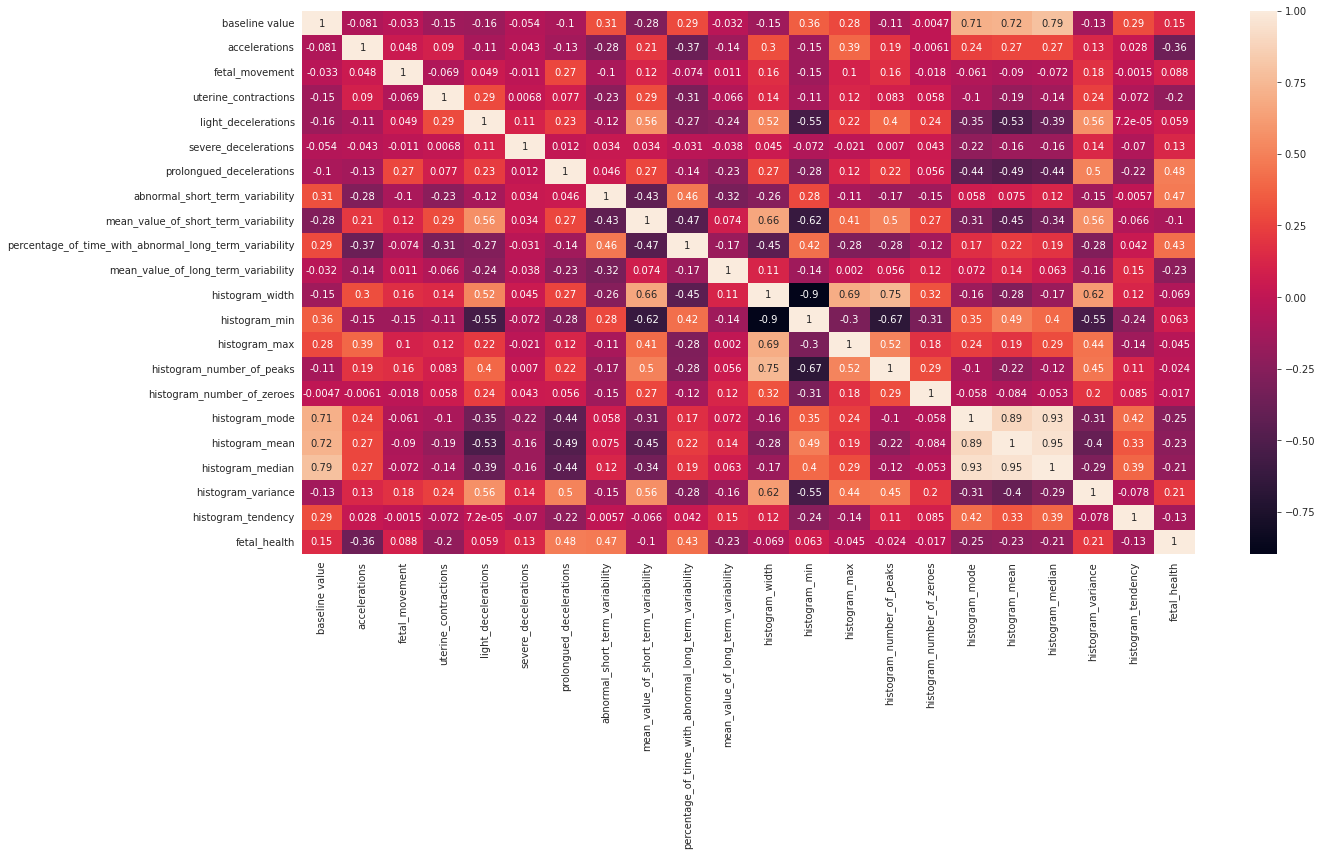

In [11]:
plt.figure(figsize=(20,10)) 
sns.heatmap(data_frame.corr(), annot=True) 

In [12]:
atributos = ['accelerations', 'uterine_contractions', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']

<Figure size 1440x720 with 0 Axes>

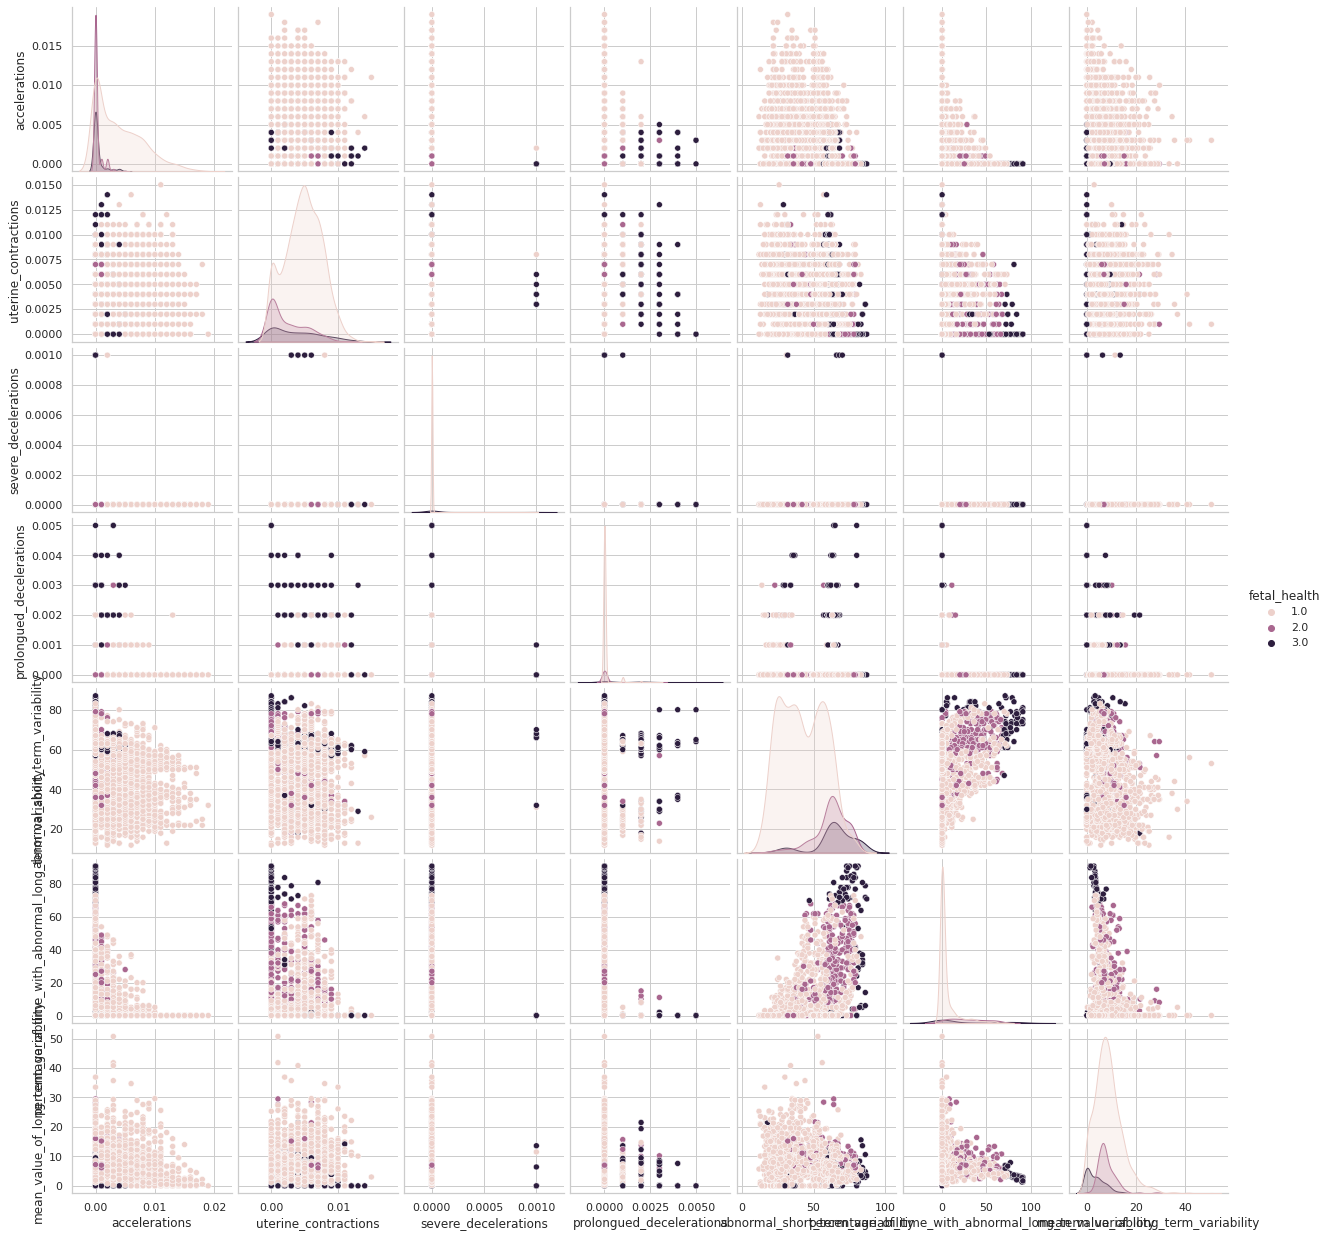

In [26]:
sns.set_theme(style="whitegrid", palette="bright", color_codes=False)
plt.figure(figsize= (20,10))
sns.pairplot(data_frame, hue= 'fetal_health', vars= atributos)

<AxesSubplot:xlabel='abnormal_short_term_variability', ylabel='percentage_of_time_with_abnormal_long_term_variability'>

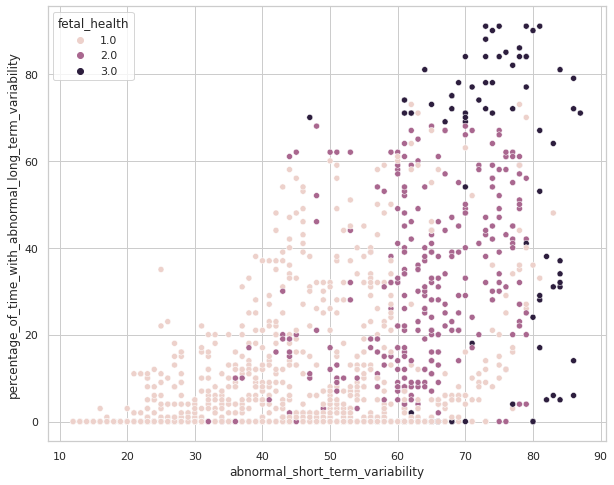

In [29]:
plt.figure(figsize= (10,8))
sns.scatterplot(x= 'abnormal_short_term_variability', y ='percentage_of_time_with_abnormal_long_term_variability',\
    hue = 'fetal_health', data = data_frame)

Nesse caso podemos perceber nitidamente os targets separados

In [31]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = data_frame[atributos]
y = data_frame.fetal_health

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Função copiada do Kagle.

In [32]:
from sklearn.svm import SVC

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=4)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.59%
_______________________________________________
CLASSIFICATION REPORT:
                   1.0         2.0         3.0  accuracy    macro avg  \
precision     0.923453    0.757576    0.890625  0.905914     0.857218   
recall        0.978430    0.515464    0.844444  0.905914     0.779446   
f1-score      0.950147    0.613497    0.866920  0.905914     0.810188   
support    1159.000000  194.000000  135.000000  0.905914  1488.000000   

           weighted avg  
precision      0.898848  
recall         0.905914  
f1-score       0.898705  
support     1488.000000  
_______________________________________________
Confusion Matrix: 
 [[1134   18    7]
 [  87  100    7]
 [   7   14  114]]

Test Result:
Accuracy Score: 89.18%
_______________________________________________
CLASSIFICATION REPORT:
                  1.0         2.0        3.0  accuracy   macro avg  \
precision    0.913462    0.792208   0.804878   0.89185    0.836849   
recall       0.957661    

Para entender a saída
https://muthu.co/understanding-the-classification-report-in-sklearn/

## Referencias

https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

https://www.kdnuggets.com/2020/03/machine-learning-algorithm-svm-explained.html

https://www.kaggle.com/faressayah/support-vector-machine-pca-tutorial-for-beginner

https://www.kaggle.com/datarohitingole/fetal-health-97-acc-multiple-model-testing/notebook